# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)

# Fetch current ETH price
eth_response = requests.get(eth_url)

# Compute current value of my crpto
import json
btc_data = btc_response.json()
eth_data = eth_response.json()
my_btc_value = (btc_data['data']['1']['quotes']['USD']['price']) * (my_btc)
my_eth_value = (eth_data['data']['1027']['quotes']['USD']['price']) * (my_eth)
crypto_value = (my_btc_value)+(my_eth_value)
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39062.40
The current value of your 5.3 ETH is $7054.99


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/Denver").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [10]:
# Compute the current value of shares
my_spy_value = (spy_close_price) * (my_spy)
my_agg_value = (agg_close_price) * (my_agg)
stock_value = my_spy_value + my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({
    'amount': [crypto_value, stock_value],
    '': ["crypto", "shares"]
}).set_index('')

# Display savings DataFrame
display(df_savings)

,amount
,
crypto,46117.389
shares,40938.500


<AxesSubplot:title={'center':'Compostition of Personal Savings'}, ylabel='amount'>

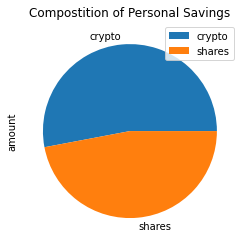

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Compostition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + stock_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulation! You have reached this financial goal")
else:
    print(f"You need ${emergency_fund-total_savings} to reach your goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-08-07', tz='America/Denver').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/Denver').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights = [.40,.60]
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30year.portfolio_data.tail()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000910,0.989971,0.998235,1.005231,0.995005,1.004638,1.001848,0.990461,0.995222,0.999400,...,0.999219,0.993036,1.004809,0.999750,0.993502,1.002303,0.992423,1.014579,0.993041,1.000746
2,1.006222,0.997191,0.995651,1.000724,0.994346,1.004383,1.005835,0.989053,0.987224,0.997845,...,0.985908,0.988862,1.006933,0.993868,0.992850,1.000967,0.990394,1.010344,1.011186,1.012106
3,1.015853,0.996929,0.994881,0.997429,1.000070,1.011176,1.005301,0.999032,0.969930,0.993370,...,0.985335,0.989143,1.013513,0.985451,0.986986,0.999910,0.986993,1.008182,1.012044,1.007975
4,1.002926,0.996137,0.995397,0.985107,1.007114,1.026576,1.001760,0.997704,0.979921,0.983783,...,0.979548,0.986494,1.022617,0.988005,0.993818,0.987512,0.974207,1.000092,1.003342,1.015529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.369863,7.982468,11.314758,4.681930,12.898853,15.007829,12.360692,4.393099,7.650538,14.752518,...,9.084549,4.226242,12.587557,11.016317,6.917549,11.121452,8.493313,7.622387,10.658611,5.493776
7557,13.415198,7.866341,11.439991,4.754322,12.980390,15.006959,12.300795,4.373377,7.586111,14.597585,...,9.156090,4.266582,12.627605,11.128210,6.949838,11.187040,8.463665,7.623633,10.578443,5.501198
7558,13.576628,7.785999,11.551453,4.770192,13.044630,15.093117,12.319020,4.393573,7.639799,14.518433,...,9.054342,4.258554,12.746128,11.011405,6.904947,11.232287,8.449099,7.630538,10.566561,5.487946
7559,13.600546,7.755462,11.558260,4.704713,12.838759,15.208420,12.222520,4.365503,7.703639,14.621680,...,9.108059,4.187553,12.749359,10.997677,6.874228,11.179460,8.528696,7.642569,10.576095,5.402445


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

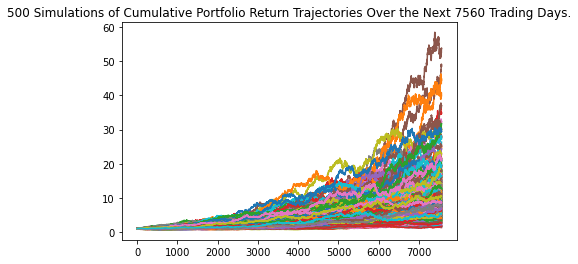

In [19]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()
line_plot

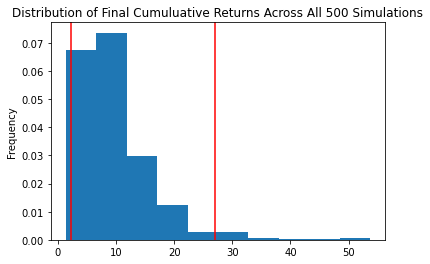

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.736918
std               6.565243
min               1.334855
25%               5.467169
50%               8.250807
75%              11.903340
max              53.717767
95% CI Lower      2.218097
95% CI Upper     26.964800
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44361.93 and $539296.01


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $66542.9 and $808944.01
